In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense,Dropout,MaxPooling2D,Activation,Flatten
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import os

Using TensorFlow backend.
C:\Users\parul\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\parul\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\parul\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\parul\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
import cv2
import matplotlib.pyplot as plt

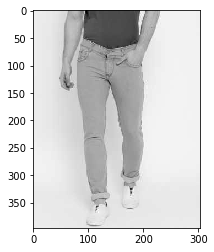

In [3]:
DATADIR="C:/Users/parul/Fliprobo/Train"
CATEGORIES=["Men Jeans","Men Trousers"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray" )
        plt.show()
        break
    break

In [4]:
print(img_array)

[[238 238 238 ... 240 240 240]
 [238 238 238 ... 240 240 240]
 [238 238 238 ... 240 240 240]
 ...
 [236 236 236 ... 236 236 236]
 [236 236 236 ... 236 236 236]
 [236 236 236 ... 236 236 236]]


In [5]:
print(img_array.shape)

(396, 303)


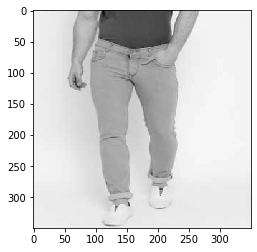

In [6]:
IMZ_SIZE=350

new_array=cv2.resize(img_array,(IMZ_SIZE,IMZ_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMZ_SIZE,IMZ_SIZE))
            training_data.append([new_array,class_num])
            
create_training_data()

In [8]:
print(len(training_data))

200


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
0
1
1
0
0


In [11]:
X=[]
y=[]

In [12]:
import numpy as np

In [13]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMZ_SIZE,IMZ_SIZE,1)

In [14]:
X=X/255.0

In [15]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=X.shape[1:]))  #excluding the -1 as that's not actually the input shape
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

print(model.summary())


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 180 samples, validate on 20 samples
Epoch 1/10
180/180 [==============================] - 109s 604ms/step - loss: 7.2287 - accuracy: 0.4722 - val_loss: 2.1499 - val_accuracy: 0.6000
Epoch 2/10
180/180 [==============================] - 109s 607ms/step - loss: 1.7000 - accuracy: 0.4389 - val_loss: 2.3445 - val_accuracy: 0.4000
Epoch 3/10
180/180 [==============================] - 109s 604ms/step - loss: 0.7433 - accuracy: 0.5444 - val_loss: 0.6518 - val_accuracy: 0.6000
Epoch 4/10
180/180 [==============================] - 109s 603ms/step - loss: 0.7102 - accuracy: 0.5056 - val_loss: 0.7374 - val_accuracy: 0.5500
Epoch 5/10
180/180 [==============================] - 109s 606ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.8383 - val_accuracy: 0.4000
Epoch 6/10
180/180 [==============================] - 109s 606ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.9662 - val_

In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [16]:
from keras.optimizers import Nadam,RMSprop,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [23]:
#SGD Optimizer
checkpoint=ModelCheckpoint(r'C:/Users/parul/.keras/clothes_classifier.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.01),
             metrics=['accuracy'])

train_samples=180
validation_samples=20
batch_size=32


model.fit(X,y,epochs=20,callbacks=callbacks,validation_split=0.1)

Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 111s 619ms/step - loss: 0.6932 - accuracy: 0.5111 - val_loss: 1.1870 - val_accuracy: 0.4000

Epoch 00001: val_loss improved from inf to 1.18699, saving model to C:/Users/parul/.keras/clothes_classifier.h5
Epoch 2/20
180/180 [==============================] - 122s 680ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 1.1872 - val_accuracy: 0.4000

Epoch 00002: val_loss did not improve from 1.18699
Epoch 3/20
180/180 [==============================] - 73s 406ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 1.1875 - val_accuracy: 0.4000

Epoch 00003: val_loss did not improve from 1.18699
Epoch 4/20
180/180 [==============================] - 68s 377ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 1.1878 - val_accuracy: 0.4000
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 1.18699

Epoch 00004: ReduceLROnPlateau reducing learning

In [24]:
#RMSprop optimizer
checkpoint=ModelCheckpoint(r'C:/Users/parul/.keras/clothes_classifier.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

train_samples=180
validation_samples=20
batch_size=32


model.fit(X,y,batch_size=batch_size,epochs=20,callbacks=callbacks,validation_split=0.1)

Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 71s 394ms/step - loss: 0.6932 - accuracy: 0.5111 - val_loss: 1.1874 - val_accuracy: 0.4000

Epoch 00001: val_loss improved from inf to 1.18736, saving model to C:/Users/parul/.keras/clothes_classifier.h5
Epoch 2/20
180/180 [==============================] - 71s 395ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 1.1877 - val_accuracy: 0.4000

Epoch 00002: val_loss did not improve from 1.18736
Epoch 3/20
180/180 [==============================] - 71s 397ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 1.1879 - val_accuracy: 0.4000

Epoch 00003: val_loss did not improve from 1.18736
Epoch 4/20
180/180 [==============================] - 71s 393ms/step - loss: 0.6932 - accuracy: 0.5111 - val_loss: 1.1881 - val_accuracy: 0.4000
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 1.18736

Epoch 00004: ReduceLROnPlateau reducing learning r

In [25]:
#Nadam Optimizer
checkpoint=ModelCheckpoint(r'C:/Users/parul/.keras/clothes_classifier.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=Nadam(learning_rate=0.01),
             metrics=['accuracy'])

train_samples=180
validation_samples=20
batch_size=32


history=model.fit(X,y,batch_size=batch_size,epochs=20,callbacks=callbacks,validation_split=0.1)

Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 76s 425ms/step - loss: 0.6934 - accuracy: 0.5111 - val_loss: 1.1918 - val_accuracy: 0.4000

Epoch 00001: val_loss improved from inf to 1.19176, saving model to C:/Users/parul/.keras/clothes_classifier.h5
Epoch 2/20
180/180 [==============================] - 91s 504ms/step - loss: 0.6935 - accuracy: 0.5111 - val_loss: 1.1924 - val_accuracy: 0.4000

Epoch 00002: val_loss did not improve from 1.19176
Epoch 3/20
180/180 [==============================] - 86s 475ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 1.1942 - val_accuracy: 0.4000

Epoch 00003: val_loss did not improve from 1.19176
Epoch 4/20
180/180 [==============================] - 84s 468ms/step - loss: 0.6932 - accuracy: 0.5111 - val_loss: 1.1963 - val_accuracy: 0.4000
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 1.19176

Epoch 00004: ReduceLROnPlateau reducing learning r